# Analysis of RTO data

In [30]:
from nbimports import *

In [31]:
import processing
processing = reload(processing)

In [32]:
# filename = "../data/user/data_04052022_143527.csv"
# filename = "../data/user/data_04052022_170752.csv"
# filename = "../data/user/data_05052022_182742.csv"
filename = "../data/user/data_09052022_180350.csv"

## all strokes

In [33]:
data = pd.read_csv(filename, index_col=0)
data.columns = ['source', 'data']

In [34]:
data_df = utils.format_from_df(data)

KeyError 13839 {'xyp_sg': [0.003996343817562, 0.009082607924938, 0.000882649794221], 's': 0.9922929538513946, 'angle': -23.97645143803291, 'da': -0.008977827266697602, 'segment_id': 360}


In [35]:
data_df.head()

,key,t0,t0_norm,ts,stroke_id,segment_id,x,y,p,x_,...,p_,x0,y0,p0,x1,y1,p1,s,angle,da
0,24176_50,24176,0.000000,50,1,0,0.454609,0.590409,0.010385,-0.002045,...,0.001578,-0.000009,0.000006,-0.000003,-0.000004,0.000003,0.000002,0.000525,2.594491,0.0
1,24189_60,24189,0.000048,60,1,0,0.453101,0.590503,0.010730,-0.003553,...,0.001923,-0.000035,0.000021,0.000026,-0.000015,0.000008,0.000014,0.001665,2.653965,0.0
2,24189_70,24189,0.000048,70,1,0,0.451665,0.590386,0.010642,-0.004990,...,0.001836,-0.000111,0.000057,0.000114,-0.000040,0.000018,0.000041,0.004380,2.712831,0.0
3,24202_80,24202,0.000095,80,1,0,0.450017,0.590156,0.010730,-0.006637,...,0.001923,-0.000287,0.000126,0.000290,-0.000092,0.000036,0.000086,0.009841,2.770858,0.0
4,24215_90,24215,0.000143,90,1,0,0.448080,0.589663,0.010970,-0.008574,...,0.002163,-0.000632,0.000233,0.000566,-0.000184,0.000059,0.000149,0.019329,2.828771,0.0


<AxesSubplot:>

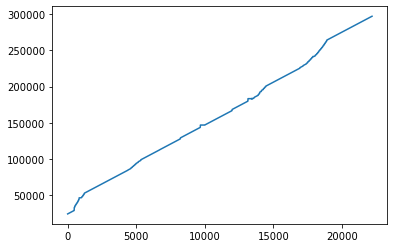

In [36]:
# data['timestamp'].plot()
data_df['t0'].plot()

In [37]:
import seaborn as sns

<AxesSubplot:xlabel='x', ylabel='y'>

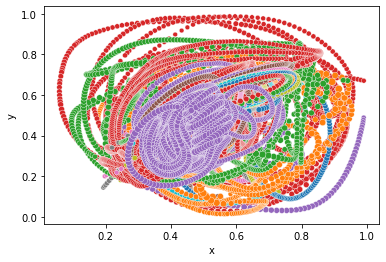

In [40]:
sns.scatterplot(data=data_df, x='x', y='y', size='p', hue='stroke_id', palette='tab10', legend=False)

In [41]:
data.shape

(22811, 2)

## features

<AxesSubplot:>

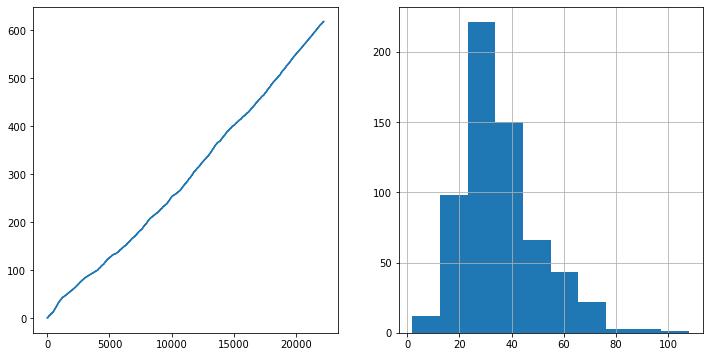

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
data_df['segment_id'].plot(ax=ax[0])
data_df.groupby('segment_id').size().hist(ax=ax[1])

The scale of the different features should be comparable for the DTW to take them into account equally. Alternatively, we could compute a Mahalanobis distance from a small batch of data.

<AxesSubplot:>

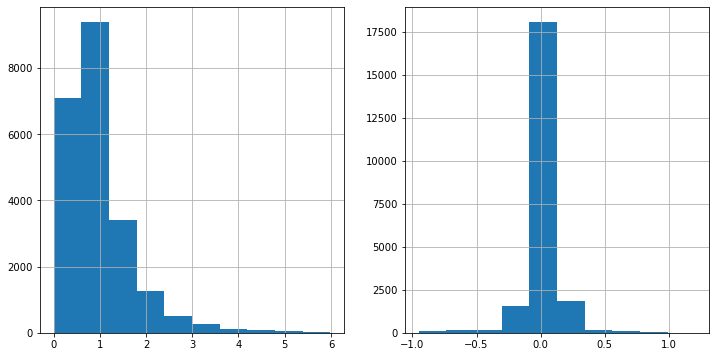

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
data_df['s'].hist(ax=ax[0])
data_df['da'].hist(ax=ax[1])

## one stroke

In [47]:
stroke_i = select(data_df, stroke_id=33)

In [48]:
stroke_i.head()

,key,t0,t0_norm,ts,stroke_id,segment_id,x,y,p,x_,...,p_,x0,y0,p0,x1,y1,p1,s,angle,da
14266,196949_50,196949,0.633000,50,33,383,0.415930,0.364716,0.007863,0.000000,...,0.000931,0.000000e+00,0.000000e+00,-0.000021,0.000000e+00,0.000000e+00,-4.150275e-06,0.000000e+00,0.000000,0.0
14267,196962_60,196962,0.633048,60,33,383,0.415930,0.364716,0.007802,0.000000,...,0.000870,0.000000e+00,0.000000e+00,-0.000021,2.571430e-10,2.592857e-09,-6.746750e-07,2.605577e-07,1.471946,0.0
14268,196974_70,196974,0.633092,70,33,383,0.415937,0.364787,0.007846,0.000007,...,0.000914,2.430967e-09,2.424890e-08,0.000013,5.528571e-09,5.519286e-08,1.190444e-05,5.546906e-06,1.470961,0.0
14269,196974_80,196974,0.633092,80,33,383,0.416008,0.365499,0.007893,0.000079,...,0.000961,5.002793e-08,4.990286e-07,0.000102,4.646072e-08,5.033714e-07,3.716470e-05,5.055110e-05,1.478758,0.0
14270,196987_90,196987,0.633140,90,33,383,0.416039,0.366901,0.007622,0.000109,...,0.000691,3.994739e-07,4.357439e-06,0.000256,2.272393e-07,2.823382e-06,7.453993e-05,2.832512e-04,1.490485,0.0


<AxesSubplot:xlabel='ts', ylabel='s'>

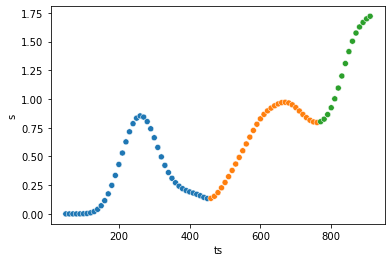

In [49]:
sns.scatterplot(data=stroke_i, x='ts', y='s', hue='segment_id', palette='tab10', legend=False)

<AxesSubplot:xlabel='ts', ylabel='angle'>

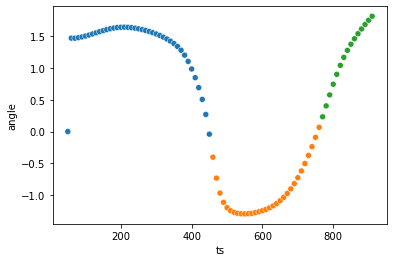

In [60]:
sns.scatterplot(data=stroke_i, x='ts', y='angle', hue='segment_id', palette='tab10', legend=False)

<AxesSubplot:xlabel='ts', ylabel='da'>

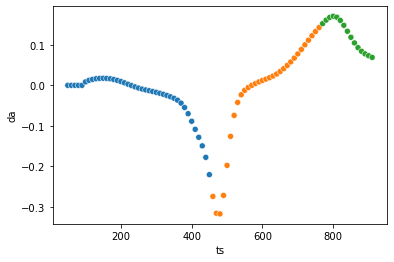

In [58]:
sns.scatterplot(data=stroke_i, x='ts', y='da', hue='segment_id', palette='tab10', legend=False)

In [50]:
list(set(stroke_i['segment_id']))

[384, 385, 383]

## check closest neighbours

This has been removed temporarily.

In [81]:
# min_dtw_id = feat_df.groupby('segment_id').first()['min_dtw_id'].values
# min_dtw = feat_df.groupby('segment_id').first()['min_dtw'].values

# plt.plot(min_dtw_id)

# plt.hist(min_dtw, range=(0, 30))

## check data processing

The angle provided by arctan2 is succeptible to wrap around. This can be accomodated with np.unwrap. However, it is currently not implemented in the js code.

In [82]:
# filename = "../data/user/data_25042022_170416.csv"

In [55]:
gi = data_df.groupby('segment_id').get_group(383)

<AxesSubplot:>

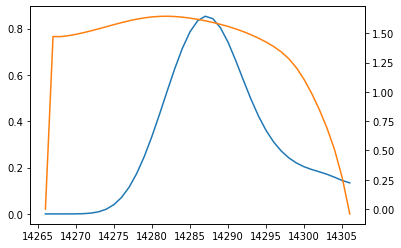

In [56]:
fig, ax = plt.subplots()
gi['s'].plot(ax=ax)
axt = ax.twinx()
gi['angle'].plot(ax=axt, c=tab10[1])

In [55]:
wl=7
po=2
savgol_dict = {'window_length':wl, 'polyorder':po, 'mode':'nearest'}

In [56]:
alpha = np.arctan2(gi['y1'], gi['x1'])
da = scsig.savgol_filter(alpha, deriv=1, **savgol_dict)

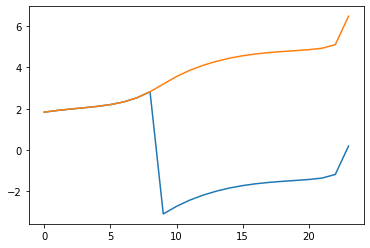

In [57]:
plt.plot(alpha.values)
plt.plot(np.unwrap(alpha))

In [58]:
alpha = alpha.values

The angle computed from atan2 is prone to phase wrapping. The function below is meant to emulate the behaviour of np.unwrap in a stream manner.
This is implemented in the MAX/MSP app in javascript.

In [59]:
def unwrap(x_arr):
    global last, acc
    last = 0
    acc = 0
    def unwrap_(x, period=np.pi):
        global last, acc
        # print(x, last, acc)
        diff = x+acc - last
        if np.abs(diff) > period:
            if diff < 0:
                acc += 2*period
            if diff > 0:
                acc -= 2*period
        x += acc
        last = x

        return x
    res = []
    for x in x_arr:
        res.append(unwrap_(x))
    
    return np.array(res)

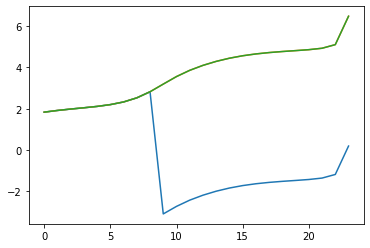

In [60]:
plt.plot(alpha)
plt.plot(np.unwrap(alpha))
plt.plot(unwrap(alpha))